In [ ]:
from feature_extraction import get_all_features
from classification import reduce_dimensionality_UMAP, fit_classifier, calculate_silhouette_score, calculate_davies_bouldin_score
from sklearn.model_selection import train_test_split
from vae_reduction import reduce_dimensionality_VAE
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-11 19:18:57.061479: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 19:18:57.062460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 19:18:57.067801: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 19:18:57.080077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to regist

In [2]:
features, labels = get_all_features("results")

UMAP dim selection

In [3]:
dims = [2, 3, 5, 10, 15, 20, 50]

In [ ]:
accuracies = []
for dim in dims:
    print(f"Reducing to {dim} dimensions using UMAP")
    X_reduced = reduce_dimensionality_UMAP(features, dim)
    X_train, X_val, y_train, y_val = train_test_split(X_reduced, labels, test_size=0.2, random_state=42)
    classifier = fit_classifier(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

Reducing to 2 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 3 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 5 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 10 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 15 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 20 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reducing to 50 dimensions using UMAP


/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


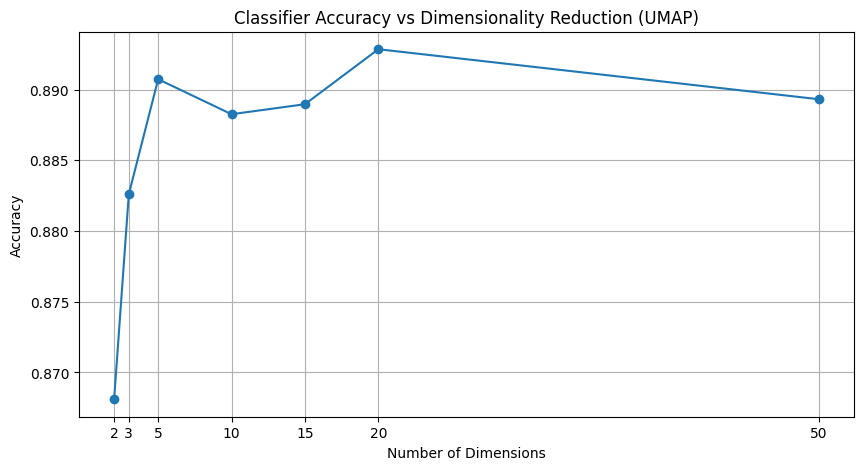

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(dims, accuracies, marker='o')
plt.title('Classifier Accuracy vs Dimensionality Reduction (UMAP)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.xticks(dims)
plt.grid()
plt.show()

VAE dim selection

In [5]:
accuracies = []
for dim in dims:
    print(f"Reducing to {dim} dimensions using VAE")
    X_reduced = reduce_dimensionality_VAE(features, dim, epochs=100)
    X_train, X_val, y_train, y_val = train_test_split(X_reduced, labels, test_size=0.2, random_state=42)
    try:
        classifier = fit_classifier(X_train, y_train)
        y_pred = classifier.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    except Exception as e:
        print(f"Error during classification with VAE for {dim} dimensions: {e}")
        accuracies.append(0)

Reducing to 2 dimensions using VAE
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
Reducing to 3 dimensions using VAE
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
Reducing to 5 dimensions using VAE
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Error during classification with VAE for 5 dimensions: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Reducing to 10 dimensions using VAE
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 

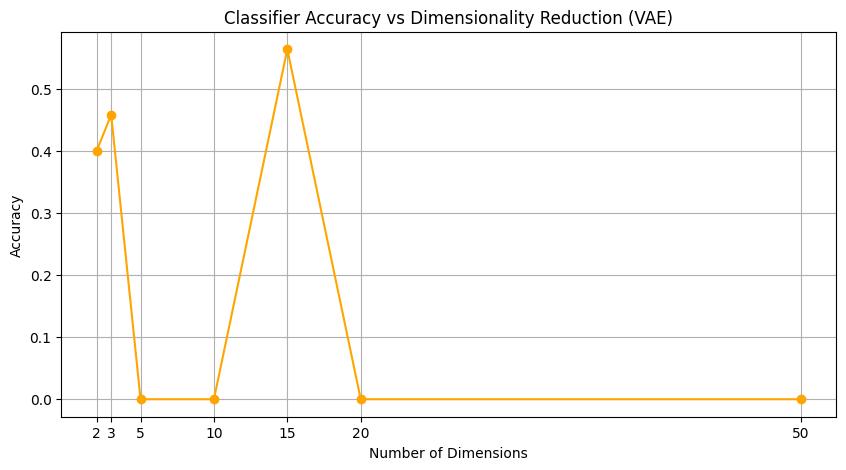

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(dims, accuracies, marker='o', color="orange")
plt.title('Classifier Accuracy vs Dimensionality Reduction (VAE)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.xticks(dims)
plt.grid()
plt.show()

UMAP k selection

In [13]:
X = reduce_dimensionality_UMAP(features, 5)

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [14]:
k_neighbors = np.arange(2, 20, 1)
silhouette_scores = []
davies_bouldin_scores = []
for k in k_neighbors:
    print(f"Calculating scores for k={k}")
    X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)
    clf = fit_classifier(X_train, y_train, k)
    y_pred = clf.predict(X_val)
    silhouette_score = calculate_silhouette_score(X_val, y_pred)
    silhouette_scores.append(silhouette_score)
    davies_bouldin_score = calculate_davies_bouldin_score(X_val, y_pred)
    davies_bouldin_scores.append(davies_bouldin_score)


Calculating scores for k=2
Calculating scores for k=3
Calculating scores for k=4
Calculating scores for k=5
Calculating scores for k=6
Calculating scores for k=7
Calculating scores for k=8
Calculating scores for k=9
Calculating scores for k=10
Calculating scores for k=11
Calculating scores for k=12
Calculating scores for k=13
Calculating scores for k=14
Calculating scores for k=15
Calculating scores for k=16
Calculating scores for k=17
Calculating scores for k=18
Calculating scores for k=19


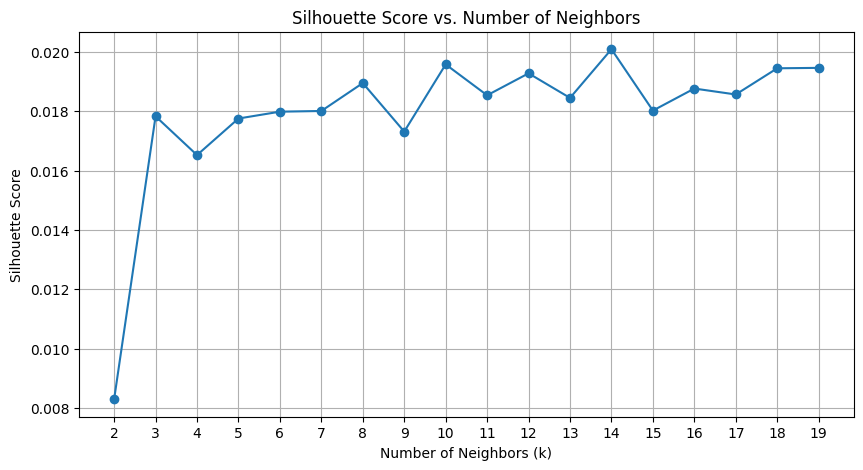

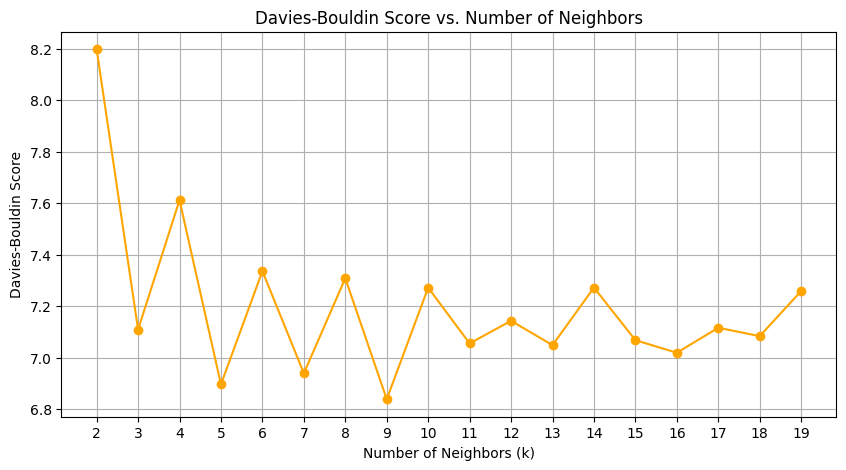

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Silhouette Score vs. Number of Neighbors")
plt.plot(k_neighbors, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_neighbors)
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Davies-Bouldin Score vs. Number of Neighbors")
plt.plot(k_neighbors, davies_bouldin_scores, marker='o', linestyle='-', color='orange')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Davies-Bouldin Score")
plt.xticks(k_neighbors)
plt.grid()
plt.show()